## 'Data Breach' key word. 

--- Project Description --- 
- The word data breach is commonly utilised within the media.
- Aim 1: To clean, summarise, analyse, visualise the dataset. 
- Aim 2: Expermient the use of multiprocessing to visualise the dataset.
- Aim 3: Storing the new dataset.
- Data source selected: Wikipedia.   

In [6]:
# Step 1. Import relevant libraries.

In [7]:
import os
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import pprint
import ast
import math
import time 
import multiprocessing
import concurrent
pd.set_option('display.width',1000000000)
pd.set_option('colheader_justify','center')
sns.set_theme('notebook','darkgrid')

In [8]:
# Step 2. Garner Data and familiarise with the dataset

In [9]:
# In this scenario, We don't have to scrape the data, using other web scraping modules. 
data_list =  pd.read_html("https://en.wikipedia.org/wiki/List_of_data_breaches")
data_breach_data_frame = data_list[0]

In [10]:
# Initial exploring of the dataset, using inbuilt methods. 
data_breach_data_frame.shape
data_breach_data_frame.describe()
data_breach_data_frame.info()
data_breach_data_frame.dtypes
data_breach_data_frame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             352 non-null    object
 1   Year               352 non-null    object
 2   Records            350 non-null    object
 3   Organization type  352 non-null    object
 4   Method             351 non-null    object
 5   Sources            350 non-null    object
dtypes: object(6)
memory usage: 16.6+ KB


,Entity,Year,Records,Organization type,Method,Sources
0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,500px,2020,14870304,social networking,hacked,[7]
2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [11]:
# Step 3. Cleaning the dataset. 

In [12]:
#Observations: 
    # Notice, the inconsistency in naming in data frame above. 
    # The 'Sources' column isn't useful, It can be utilised by attaining the relevant data. (e.g. via web scraping)
        # In this project the sources column will be removed.    
data_breach_data_frame.columns 
data_breach_data_frame = data_breach_data_frame.rename(lambda name:  re.sub('\s','_',name.title()),axis='columns')
data_breach_data_frame.drop('Sources',inplace=True,axis='columns') 
# After taking multple samples and looking at the dataset more closely, there is inconsistency within them. 
data_breach_data_frame.sample(20)

,Entity,Year,Records,Organization_Type,Method
240,"Seacoast Radiology, PA",2010,231400,healthcare,hacked
61,"Chinese gaming websites (three: Duowan, 7K7K, ...",2011,10000000,web,hacked
202,Nemours Foundation,2011,1055489,healthcare,lost / stolen media
161,Kirkwood Community College,2013,125000,academic,hacked
248,SolarWinds,2020,Source Code Compromised,Network Monitoring,hacked
331,Wattpad,2020,270000000,web,hacked
322,View Media,2020,38000000,online marketing,publicly accessible Amazon Web Services (AWS) ...
181,Medical Informatics Engineering,2015,3900000,healthcare,hacked
106,Exactis,2018,340000000,data broker,poor security
166,KT Corporation,2012,8700000,telecoms,hacked


In [13]:
# Data Cleaning Columns. 

In [14]:
# Applies to all columms. 
    # Indepth research for each data point isn't conducted as the dataset is substantial. 
    # Any errors, assumptions, any other foresight are tried to be reduced as much as possible. 

In [15]:
# Entity Column

In [16]:
 # Steps: 
    # 1. Removing details within brackets. 
            #Since dataset is small, and most companies don't have '()' within their company names. The, brackets are removed. 
            # E.g. Other names of similar entities in different countries, might be an issue, if the dataset was large. 
    # 2. Removing details after a single comma results in a different company/ambigious company sometimes, hence it's kept. 
            # Since manually checking this and cleaning will take too long. 
            # Company names may contiain ampersand in it usually so, they aren't checked for having additional details. 
    # 3. The Inc. or Co. or small abbreviation at the end is kept. 
        # Since each country and states have different ways of dealing with the legal representation of a corporation. 
        # Some companies can have 'inc.' in their names based on country. 
    # 4. If multiple companies are represented in a single data row e.g. Linkedin, eharmony and Last.fm. 
            # A process to filter this out is coded, to help in manually reducing the dataset. 
            # If a company is registered under two names, or change of name; one name is kept. 
            # The data is kept the companies are broken up into a single row with records being approximatley equally distributed amongst, companies. 
    # 5. Managing companies, helper companies for data handling, if found using a semi-coded process, they are removed. 
            # e.g. Health Net - IBM. Health Net is kept as that's the company and IBM is removed as it's the data managment/handling company for Health Net. 
    # 6. Every thing else: Punctuation, Case, data type etc.. is kept the same. # Character codes, rarely used are processed. 
            # Main reason being for this is for Natural Language Processing reducing the dataset dimensions, alterign the names for easy of use makes appropriate sense. 
            # Since hre, the aim is for analysis and visualisation not machine learning models building and comparing, this is not considered.
   
        
# Step 0. 
# After Using the following to deem which records need to be split up, renamed, etc.. 
# Helps in implenting the data cleaning for this column. 
def has_punctuation(entity_name):
    for punctuation_symbol in string.punctuation: 
        if punctuation_symbol in entity_name: 
            return True
    return False

data_breach_data_frame['Entity'].apply(has_punctuation)

# Step 1 
def detail_commas_removal(entity_name):
    entity_name = re.sub('\(.*\)','',entity_name)
    entity_name = entity_name.strip()
    return entity_name 

# Comparing to ensure, the data is processed based on what's expected. 
data_breach_data_frame['Entity_n'] = data_breach_data_frame['Entity'].apply(detail_commas_removal)
data_breach_data_frame[data_breach_data_frame['Entity'].apply(lambda unprocessed_entity_name:'(' in unprocessed_entity_name)][['Entity','Entity_n']]

# Steps 2 and 3. Data kept as is.  

# Step 4. 

# Long entity names are actual entites, not description/other detail present. 
data_breach_data_frame['Entity_Len'] = data_breach_data_frame['Entity_n'].apply(lambda entity_name: len(entity_name))

# Used for checking the median length of entity names.
#print('Median',data_breach_data_frame['Entity_Len'].median()) 

# visual depiction of obscure values.
#data_breach_data_frame['Entity_Len'].sort_values().plot(kind='hist',title='Entity Name Lengths') 

# Since, entity name lengths are positively skewed, and there seems to be a few groups with long entity names.  
    # This needs be addressed; Additional details are being kept for extremely long name lenghts. 
    # A visual inspection is conducted, further statistical methods for outliers aren't necessary. 
outliers_maybe = data_breach_data_frame[['Entity_n','Entity_Len']].sort_values('Entity_Len',ascending=False).head(2)['Entity_n']

for tuple_entity_value in zip(outliers_maybe.index, outliers_maybe.values):
    #print(tuple_entity_value) # used for checking the long entity names. 
    pass
    # index 260, when researched into the naming of the hotels/resorts.  
        # All fall under: Starwood Hotels and Resorts Worldwide, inc.
    # index 179, has an ambigious number of american businesses involved including 7-11 and NASDAQ.
        # The names of all businesses impacted are not known, 
        # Since the businesses were banks, retail chains, credit authorities, etc.. (Please see footnotes/source for the row of interest on wikipedia) 
        # Whilst some of the businesses may not be listed under NASDAQ. 
        # The appropriate value for this enity_name is unknown.
data_breach_data_frame['Entity_n'].iloc[260] = 'Starwood Hotels and Resorts Worldwide, Inc.'
data_breach_data_frame['Entity_n'].iloc[179] = 'Unknown'

# Multiple entity names present in a single cell. 
    # From step 0. 
        # Companies with more than one ',' may indicate multiple company names.   
        # A slash may indicate the following:  
            # more than one company
            # company registered under different names.
            # change of names or same company
        # A dash may indicate the following:  
            # A helper entity, parent entity, related entity.
            # Additional details. 

to_process_maybe = data_breach_data_frame['Entity_n'][
data_breach_data_frame['Entity_n'].apply(lambda entity_name: len(entity_name.split(',')) >= 3 or len(entity_name.split('-')) >= 2 or '/' in entity_name)]

for tuple_entity_value in zip(to_process_maybe.index,to_process_maybe.values):
    #print(tuple_entity_value) # Printed this to check the entity names to clean 
    pass
# The entity values with indicies 19, 108, 172, 280. need to be changed. As explained. 
# Manual naming like above is done, since each case is slightly different.
#TO DO: Since Data needs to be prorccesed further, index 172 is going to be processed later onwards. See below.
indexes_to_process_after_more_cleaning_and_transformation = [172]

for entity_index, value_altered_to in [(19,'BlueToad'),(108,'Experian'),(280,'TJX Companies')]:
    data_breach_data_frame['Entity_n'].iloc[entity_index] = value_altered_to

# Step 5
# Handles character codes, not usually typed via a keyboard/miscellaneous. 
def uncommon_characters_in_entity_names(entity_name):
    for letter in entity_name: 
        entity_name = re.sub('[\t\r\s\n]+','',entity_name)
        if not letter in '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#\$%&\'\(\)\*\+\,-\.\/:;<=>\?@\[\\\]\^_`{\|}~ ' :
            return True 
    return False 

data_breach_data_frame[data_breach_data_frame['Entity_n'].apply(uncommon_characters_in_entity_names)]
# From observing the output, id 138 needs to be altered as Health Net violated privacy by its practices, 
# Hence, entity name is going to be Health Net. 
# All other data records with other character codes, are fine. 
data_breach_data_frame['Entity_n'].iloc[138] = 'Health Net'

# Checking for plural, generally companies have nouns as names.
def uncommon_words_in_entity_names(entity_name):
    return re.search(r'\b\w+e?s\b', entity_name) is not None
# Dataset proportion to manually see uncleaned data for entity names.
data_breach_data_frame[data_breach_data_frame['Entity_n'].apply(uncommon_words_in_entity_names)]
data_set_current_percentage = len(data_breach_data_frame[data_breach_data_frame['Entity_n'].apply(uncommon_words_in_entity_names)].index) / len(data_breach_data_frame.index) * 100
 # Whilst the current data_set_current_percentage 25.28 %. This is still substantial to manually process. 
 # To solve this further processing was carried out. 
    # Here are some questions considered:
     # How does having numeric search pattern reduce the dataset ? 
     # How does having common restricted words within a company name reduce the dataset ? 
            # (not done, different restrictions for different countries)

def numeric_processing_further(entity_name): 
    return re.search(r'\d+',entity_name) is not None 
data_breach_data_frame[data_breach_data_frame['Entity_n'].apply(numeric_processing_further)]
# Id 46, 48 both have year and other unecesssary details in their entity_names. 
# Id 350 has a very broad definition of entity_names hence the data row has been removed.  
to_change_entity_name_data_frame = data_breach_data_frame.iloc[[46,48]]['Entity_n']

for entity_index,entity_value in zip(to_change_entity_name_data_frame.index, to_change_entity_name_data_frame.values): 
    data_breach_data_frame['Entity_n'].iloc[entity_index] = ' '.join(re.sub(r'\d+','',entity_value).strip().split()[:-1]).strip()

data_breach_data_frame.drop(350,inplace=True)

# Steps 6 Data is kept the same. See above.

data_breach_data_frame['Entity'] = data_breach_data_frame['Entity_n']
data_breach_data_frame.drop('Entity_n',axis='columns',inplace=True)
data_breach_data_frame.drop('Entity_Len',axis='columns',inplace=True)
data_breach_data_frame # Final Output with Entity Colymn processed. 

/var/folders/2r/rg0cy7hn56970hbk66__swyr0000gn/T/ipykernel_70149/1674562194.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_breach_data_frame['Entity_n'].iloc[260] = 'Starwood Hotels and Resorts Worldwide, Inc.'
/var/folders/2r/rg0cy7hn56970hbk66__swyr0000gn/T/ipykernel_70149/1674562194.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_breach_data_frame['Entity_n'].iloc[179] = 'Unknown'
/var/folders/2r/rg0cy7hn56970hbk66__swyr0000gn/T/ipykernel_70149/1674562194.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,Entity,Year,Records,Organization_Type,Method
0,21st Century Oncology,2016,2200000,healthcare,hacked
1,500px,2020,14870304,social networking,hacked
2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...
346,Zappos,2012,24000000,web,hacked
347,Zynga,2019,173000000,social network,hacked
348,Unknown agency,2020,200000000,financial,accidentally published
349,National Health Information Center of Slovakia,2020,391250,healthcare,poor security


In [17]:
# Year Column  
to_process = data_breach_data_frame[data_breach_data_frame['Year'].apply(lambda year: re.search('^[0-9]{4}$',year.strip()) is None)]
# For all ids to be processed two years are given. 
# Hence, the lower year is taken since, that's when data breach was first identified/speculated to have occurred.
for row_index_to_alter, year in zip(to_process.index,to_process['Year'].apply(lambda years: years[:4]).values):
    data_breach_data_frame['Year'].iloc[row_index_to_alter] = year

type(data_breach_data_frame['Year'][0]) # Years should be of type integers, not string. 
data_breach_data_frame['Year'] = data_breach_data_frame['Year'].astype(int)
data_breach_data_frame # Final Output with Year column processed. 


,Entity,Year,Records,Organization_Type,Method
0,21st Century Oncology,2016,2200000,healthcare,hacked
1,500px,2020,14870304,social networking,hacked
2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...
346,Zappos,2012,24000000,web,hacked
347,Zynga,2019,173000000,social network,hacked
348,Unknown agency,2020,200000000,financial,accidentally published
349,National Health Information Center of Slovakia,2020,391250,healthcare,poor security


In [18]:

# Records # the records column assumes data is for that many 
          # Assumes a record is a row in a database. 
# records cell values are either of of type string and float. They should be of type integer
data_breach_data_frame['Records'].apply(lambda record: type(record)).unique()
data_breach_data_frame[data_breach_data_frame['Records'].apply(lambda record: type(record) is float)]
# Numpy uses floating point arithmetic for calculations. According to IEEE 754 standard. 
# np.nan is the IEEE 754 floating-point representation of Not a Number. (Please search online for more information on this topic.) 
# The np.nan values will be dealt with later as unknown. See below. At this stage the np.nan values will be converted to unknown. 
# Hence, currently all other data cleaning for this column will be conducted. 
for index_record_nan in data_breach_data_frame[data_breach_data_frame['Records'].isna()].index:
    data_breach_data_frame['Records'].iloc[index_record_nan] = 'unknown'

#lowercase all records   
data_breach_data_frame['Records'] = data_breach_data_frame['Records'].apply(lambda record: record.lower())
    
# Converted to unknown (detailed research isn't done on updates etc. for each datapoint see above on data cleaning.)
    # id 27 g20 world leaders doesn't specify data volume. Hence it's unknown. 
    # id 66 has extra details not necessary. Thus, it's unknown. 
    # id 221 since it's undisclosed, it's unknown to the public/masses. 
    # id 248 doesn't specify data volume of the compromised source code therefore, it is unknown. 
    # id 315 since it's tbc(to be confirmed), may insinuate that an investigation is ongoing and more details may be given. Hence, it's unknown. 
for id_record_to_process in [27,66,221,248,315]:
    data_breach_data_frame['Records'].iloc[id_record_to_process] = 'unknown'


# id 47, 48, 76 all contain information about the approximate size of data records being stolen/compromised.
# Hence, for these ids they are compared to according sizes within the dataset.
# Each case is slightly handeled differently. 
# these rows will be dealt with later. More cleaning is required. 
    # E.g. 
    # id 47 is a retail organisation with the entity british airways, the records are in tens of thousands. 
        # All these details and others are taken into account when deciding the value to set for this record.
        # Rely on other columns that aren't processed.
indexes_to_process_after_more_cleaning_and_transformation.extend([47,48,76,94,82])

# Based on record definition, 
# Since a record isn't the number of stores or locations, it's the number of rows in a database on a particular entity. 
# E.g. For a Hotel the records will be the number of guests, their details, etc.. stored on the the hotel's database management system. 
# Hence, the number records for 'locations' 'stores' are unknown. 
# Similarly, for the size of the the data breached: gigabytes, petabytes, terabytes. 
# The number of records depends on 
# Storage efficiency of disk, database storage system, the size of row, the number of columns, the data types stored, etc.. 
# to determine this, but since there are too many variables to take into account. 
# Making an assumption by using a commonly used DBMS System for an estimate will create variability, even if it's minute.
# Hence, they are determined to be unknown. 

# Dealing with values that have alphanumeric characters in them other than unknown and indicies to be processed afterwards. 
def not_numeric_or_unknown_only(record): 
    return (re.search('.*[a-z].*',record) is not None and not (re.search('.*unkn.*',record) is not None))

data_breach_data_frame_interest = data_breach_data_frame[data_breach_data_frame['Records'].apply(not_numeric_or_unknown_only)]

for id_of_interest in [ids for ids in data_breach_data_frame_interest.index if ids not in indexes_to_process_after_more_cleaning_and_transformation]:
    data_breach_data_frame.loc[id_of_interest,'Records'] = 'unknown'


/var/folders/2r/rg0cy7hn56970hbk66__swyr0000gn/T/ipykernel_70149/3862368794.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_breach_data_frame['Records'].iloc[index_record_nan] = 'unknown'
/var/folders/2r/rg0cy7hn56970hbk66__swyr0000gn/T/ipykernel_70149/3862368794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_breach_data_frame['Records'].iloc[id_record_to_process] = 'unknown'


In [19]:
# Organization_type: divides each entity into a category/sector it falls under. 
data_breach_data_frame['Organization_Type'] = data_breach_data_frame['Organization_Type'].apply(lambda name: name.lower())
category_names = sorted(data_breach_data_frame['Organization_Type'].unique())

# Looking at category, 
    # 1. Abbreviated categories are changed to full names, similar naming is processed. # E.g. 'Telecom' to 'Telecommunications'
    # 2. A subcategorised category is appropriately renamed. # E.g. 'Government, Healthcare' is altered to 'Government'. 
    # 3. Some categories are renamed according to make them more understandable. 

# Function created to change and look at each category value names; Can be generalised further and made more flexible.
def col_value_name_change(data_frame,col_name,curr_value_name,new_value_name,inplace=False,show_old_new=False,show_curr=False,n_rows=5):
    index = data_frame[data_frame[col_name] == curr_value_name].index
    temp_df = data_frame[data_frame[col_name] == curr_value_name][:]
    if inplace:
        data_frame.loc[index,col_name] = new_value_name
    if show_curr: 
        print('-- Curr -- ')
        print(temp_df.head(n_rows))
    if show_old_new:
        print('-- Old -- ')
        print(temp_df.head(n_rows))
        print('-- New -- ')
        temp_df.loc[index,col_name] =  new_value_name
        print(temp_df.head(n_rows))

# Helper function created for data cleaning. 
def seeing_current_rows_for_each_category():
    for value_name in category_names: 
        print('\n', value_name)
        col_value_name_change(data_breach_data_frame,'Organization_Type',value_name,value_name, show_curr=True)


seeing_current_rows_for_each_category()
# See Above for more detail on steps. 

# To make this process easier, a simple notion was utilised, since the category are sorted (see above).
# Each was split by alphabet characters, 
# the use of regulare expression module, other packages or other ideas weren't necessary in this case. 
def cat_split(category_names):
    letter_based_separation = {}
    previous_letter = ''  
    for category_name in category_names:
        next_letter = category_name[0]
        if next_letter != previous_letter: 
            letter_based_separation[next_letter] = [category_name]
        else: 
            letter_based_separation[next_letter].append(category_name)
        previous_letter = next_letter 
    return letter_based_separation

category_names = cat_split(category_names)     

# Instead of further using modules and more processing functions, to further aid in the cleaning process a hybrid approach was utilised of code and manual processing. 
# Step 1, Step 2 & 3: Abbreviation, Subcategoriesd categories names respectively are processed, more understandable naming (see above)

# Abbreviations and subcategoriesd categories names are easily identifiable per alphabet letter. 
pp = pprint.PrettyPrinter()
pp.pprint(category_names)




 academic
-- Curr -- 
                 Entity              Year Records  Organization_Type          Method        
28   Australian National University  2019  unknown      academic                      hacked
161      Kirkwood Community College  2013   125000      academic                      hacked
218           Ohio State University  2010   760000      academic                      hacked
258             Stanford University  2008    72000      academic      lost / stolen computer
300       Universiti Teknologi MARA  2019  1164540      academic                      hacked

 advertising
-- Curr -- 
   Entity   Year Records Organization_Type  Method
6  AerServ  2018   75000     advertising    hacked

 arts group
-- Curr -- 
            Entity         Year Records  Organization_Type     Method    
336  Woodruff Arts Center  2019  unknown     arts group     poor security

 background check
-- Curr -- 
      Entity     Year  Records  Organization_Type  Method 
59  CheckPeople  2020  56000

-- Curr -- 
       Entity    Year  Records    Organization_Type    Method 
285  Truecaller  2019  299055000  telephone directory  unknown

 ticket distribution
-- Curr -- 
      Entity    Year  Records   Organization_Type    Method
277  Ticketfly  2018  26151608  ticket distribution  hacked

 transport
-- Curr -- 
             Entity          Year                      Records                       Organization_Type        Method       
9                Air Canada  2018                                              20000      transport                  hacked
46          British Airways  2018                                             500000      transport                  hacked
54   Cathay Pacific Airways  2018                                            9400000      transport                  hacked
94                  EasyJet  2019  9,000,000 (approx) - basic booking, 2208 (cred...      transport                  hacked
142        Heathrow Airport  2017                               

In [20]:
### # Certain categories are aggregated based on what is deemed the best suitable name. 
category_names_of_interest = [
                             (category_names['a'][2:3],'arts'),
                             (category_names['b'][0:1],'information security'),
                             (category_names['b'][1:2],'financial'),
                             (category_names['d'],'online'),
                             (category_names['f'][0:1],'consumer goods'),
                             (category_names['f'][2:],'financial'),
                             (category_names['g'][1:2],'gaming'), 
                             (category_names['g'][5:], 'government'),
                             (category_names['h'][:2], 'health care'), 
                             (category_names['h'][2:3],'information technology'),
                             (category_names['l'][0:1],'web'),
                             (category_names['m'][4:5],'military'),
                             (category_names['n'][0:1],'information security'),
                             (category_names['o'],'online'),
                             (category_names['p'][0:1],'unknown'), # unknown since, entity_name is unknown and data variety is high; multiple organization_types can be given.
                             (category_names['p'][1:2],'retail'),
                             (category_names['p'][2:3],'government'),
                             (category_names['p'][3:],'online'),
                             (category_names['q'],'online'),
                             (category_names['s'][0:1],'retail'),
                             (category_names['s'][2:4],'social media'),
                             (category_names['s'][4:5],'information technology'),
                             (category_names['s'][5:],'government'), 
                             (category_names['t'][:3], 'technology'),
                             (category_names['t'][3:6], 'telecommunications'),
                             (category_names['t'][6:8],'online'),  
                             (category_names['w'][:4], 'online'),
                             (category_names['w'][4:5], 'social media')]

for category_names_to_change, new_category_name in category_names_of_interest:
    for old_category_name in category_names_to_change:
        # Used for checking, what's expected and what's wanted.
        #col_value_name_change(data_breach_data_frame,'Organization_Type',old_category_name,new_category_name,show_old_new=True)   
        col_value_name_change(data_breach_data_frame,'Organization_Type',old_category_name,new_category_name,show_old_new=True, inplace=True)   

''' # Used for each individual category lettery checking see example below for letter 'w' organisation type.                          
for old_category_name in category_names['p'][2:]:
        # Used for checking, what's expected and what's wanted.
        #col_value_name_change(data_breach_data_frame,'Organization_Type',old_category_name,new_category_name,show_old_new=True)   
        col_value_name_change(data_breach_data_frame,'Organization_Type',old_category_name,'telecommunications',show_old_new=True)   
'''



-- Old -- 
            Entity         Year Records  Organization_Type     Method    
336  Woodruff Arts Center  2019  unknown     arts group     poor security
-- New -- 
            Entity         Year Records  Organization_Type     Method    
336  Woodruff Arts Center  2019  unknown        arts        poor security
-- Old -- 
      Entity     Year  Records  Organization_Type  Method 
59  CheckPeople  2020  56000000  background check  unknown
-- New -- 
      Entity     Year  Records    Organization_Type    Method 
59  CheckPeople  2020  56000000  information security  unknown
-- Old -- 
        Entity       Year Records Organization_Type     Method    
45  BMO and Simplii  2018   90000       banking      poor security
-- New -- 
        Entity       Year Records Organization_Type     Method    
45  BMO and Simplii  2018   90000      financial     poor security
-- Old -- 
     Entity   Year  Records   Organization_Type     Method    
106  Exactis  2018  340000000     data broker    poo

    Entity  Year  Records   Organization_Type  Method
228  Quora  2018  100000000       online       hacked
-- Old -- 
         Entity      Year Records Organization_Type    Method  
155  Japanet Takata  2004  510000      shopping      inside job
-- New -- 
         Entity      Year Records Organization_Type    Method  
155  Japanet Takata  2004  510000       retail       inside job
-- Old -- 
      Entity   Year  Records   Organization_Type          Method        
110  Facebook  2013    6000000   social network   accidentally published
111  Facebook  2018   50000000   social network            poor security
112  Facebook  2019  540000000   social network            poor security
113  Facebook  2019    1500000   social network    accidentally uploaded
114  Facebook  2019  267000000   social network            poor security
-- New -- 
      Entity   Year  Records   Organization_Type          Method        
110  Facebook  2013    6000000    social media    accidentally published
111  Fac

" # Used for each individual category lettery checking see example below for letter 'w' organisation type.                          \nfor old_category_name in category_names['p'][2:]:\n        # Used for checking, what's expected and what's wanted.\n        #col_value_name_change(data_breach_data_frame,'Organization_Type',old_category_name,new_category_name,show_old_new=True)   \n        col_value_name_change(data_breach_data_frame,'Organization_Type',old_category_name,'telecommunications',show_old_new=True)   \n"

In [21]:
data_breach_data_frame['Organization_Type'] = data_breach_data_frame['Organization_Type'].apply(lambda org_type_category: org_type_category.title())
data_breach_data_frame

,Entity,Year,Records,Organization_Type,Method
0,21st Century Oncology,2016,2200000,Health Care,hacked
1,500px,2020,14870304,Social Media,hacked
2,Accendo Insurance Co.,2020,175350,Health Care,poor security
3,Adobe Systems Incorporated,2013,152000000,Technology,hacked
4,Adobe Inc.,2019,7500000,Technology,poor security
...,...,...,...,...,...
346,Zappos,2012,24000000,Online,hacked
347,Zynga,2019,173000000,Social Media,hacked
348,Unknown agency,2020,200000000,Financial,accidentally published
349,National Health Information Center of Slovakia,2020,391250,Health Care,poor security


In [22]:
# Method column data cleaning 

# Making sure the data types for the column method are consistent for each cell data value. 
not_str = data_breach_data_frame[data_breach_data_frame['Method'].apply(lambda method: type(method) is not str)]
# There is a cell with logically empty value/no value in it, technically np.nan value.
# As noted previously, np.nan is a floating point representation of Not a Number. 
# Since, numpy uses the IEEE 754 standard for airthmetic operations. 
# Therefore the np.nan value is converted to unknown, and processed later onwards. 

data_breach_data_frame.loc[not_str.index,'Method'] = 'unknown'
data_breach_data_frame['Method'] = data_breach_data_frame['Method'].apply(lambda method: method.lower())

print(data_breach_data_frame['Method'].unique(),data_breach_data_frame['Method'].nunique())
method_unique_values = list(data_breach_data_frame['Method'].unique())
# The method/cause of databreach is categorised in the following categories. 
# This idea is used, as data visualisation is to be done in this project as specified above.
# If a category falls between the two, than they are assigned appropriately. Randomly if need be.  
# the categories chosen are: 'hacked', 'theft', 'accidental exposure', 'insiders'. unknwon for null vaues as described above. 
# the current column has insights into what occured; this provides additional detail, it can be utilised in a new column termed reason. 
# however, since this is a exploratory data analysis and visualisation poject, it's not considered. 

func = lambda str_a,str_b: lambda method_name: re.sub(r"[a-zA-Z,\/ ]*(?:" + str_a + ")[ a-z\/A-Z]*",str_b,method_name)

for pattern_segment, replacement_name in [('(hacked|poor security|social engineering|zero-day vulnerabilities)','hacked'),
                                          ('lost','theft'),
                                          ('rogue contractor|inside job','insider job'), 
                                          ('accidentally|data exposed by misconfiguration|unprotected api|unsecured s3 bucket', 'accidental exposure'), 
                                          ('publicly accessible amazon web services \(aws\) server', 'accidental exposure')]:
    
    data_breach_data_frame['Method'] = data_breach_data_frame['Method'].apply(func(pattern_segment,replacement_name))

data_breach_data_frame['Method'].unique() 
# The dataset spread across 24 different categories for the method type is 
# now contracted into a much more managable method of 5 categories. 




['hacked' 'poor security' 'lost / stolen media' 'accidentally published'
 'inside job, hacked' 'lost / stolen computer' 'unknown'
 'unsecured s3 bucket' 'inside job' 'accidentally uploaded'
 'poor security / hacked' 'unprotected api' 'poor security/inside job'
 'data exposed by misconfiguration' 'zero-day vulnerabilities'
 'intentionally lost' 'misconfiguration/poor security' 'ransomware hacked'
 'rogue contractor' 'improper setting, hacked' 'hacked/misconfiguration'
 'publicly accessible amazon web services (aws) server'
 'accidentally exposed' 'social engineering'] 24


array(['hacked', 'theft', 'accidental exposure', 'unknown', 'insider job'],
      dtype=object)

In [23]:
data_breach_data_frame.head() 

,Entity,Year,Records,Organization_Type,Method
0,21st Century Oncology,2016,2200000,Health Care,hacked
1,500px,2020,14870304,Social Media,hacked
2,Accendo Insurance Co.,2020,175350,Health Care,hacked
3,Adobe Systems Incorporated,2013,152000000,Technology,hacked
4,Adobe Inc.,2019,7500000,Technology,hacked


In [24]:
# Now the following indexes can be processed. 
indexes_to_process_after_more_cleaning_and_transformation.sort()
data_breach_data_frame.iloc[indexes_to_process_after_more_cleaning_and_transformation]

,Entity,Year,Records,Organization_Type,Method
47,British Airways,2015,tens of thousands,Retail,hacked
48,Bulgarian revenue agency,2019,"over 5,000,000",Government,hacked
76,CVS,2015,millions,Retail,hacked
82,Deloitte,2017,350 clients emails,"Consulting, Accounting",hacked
94,EasyJet,2019,"9,000,000 (approx) - basic booking, 2208 (cred...",Transport,hacked
172,"LinkedIn, eHarmony, Last.fm",2012,8000000,Online,accidental exposure


In [25]:
# All validation, optimisation checks, edge cases, haven't been conducted as not needed for current use case.
def split_integers(x,n):
    if type(x) != int and type(n) != int: return print('Both parameters must be integers.')
    elif (x <= 0 or n <= 0): return print('Both parameters must be positive integers.') 
    elif  n > x: return print('Since integers splitting only, Divisor must be less than dividend.')
    
    equal_number = x // n 
    remainder = x % n
    split_nums = n * [equal_number]
    while remainder != 0:
            split_nums[remainder] += 1 
            remainder -= 1
    return split_nums
    

#For id 172:
index_of_interest = 172
data_series = data_breach_data_frame.iloc[index_of_interest]
entity_names = [entity_name.strip() for entity_name in data_series['Entity'].split(',')]
year,organization_type,method = len(entity_names) * [data_series['Year']], len(entity_names) * [data_series['Organization_Type']],len(entity_names) * [data_series['Method']] 
records = [str(integer) for integer in split_integers(int(data_series['Records']),len(entity_names))]
data_records = pd.DataFrame([list(x) for x in zip(entity_names,year,records,organization_type,method)],columns=list(data_breach_data_frame.columns))
data_breach_data_frame.drop(index=index_of_interest,inplace=True)
data_breach_data_frame = data_breach_data_frame.append(data_records,ignore_index=True)
print(data_breach_data_frame.tail())
indexes_to_process_after_more_cleaning_and_transformation.pop()

# For id 82: '350 client emails', the words have to be removed. 
index_of_interest = 82
data_breach_data_frame.loc[index_of_interest,'Records'] = data_breach_data_frame.loc[index_of_interest,'Records'].split()[0]

# For id 94: '9,000,000 (approx) - basic booking, 2208 (credit card details)'
index_of_interest = 94
data_breach_data_frame.loc[index_of_interest,'Records'] = str(eval(re.sub('[a-zA-Z(), ]','',re.sub('-','+',data_breach_data_frame.loc[94]['Records']))))

# Central tendency measure: median is used, to handle id 47, 48 and 76. 
    # Domain knowdlege about what the average number of data breach records being garnered by intruders, can also be used here, and various other techniques. 
# For id 48. For 'over 5,000,000' records, anything over to 5,000,000 
# For id 47. For 'tens of thousands' the phrase indicates magnitued assumeed from 20,000 - 999,999
# For id 76, For 'millions' this is anything equal to or over a 1,000,000.

for id_interest, pattern in [(48,'(?:5\d{5}[1-9]|5\d{4}[1-9]0|5\d{3}[1-9]\d0|5\d{2}[1-9]\d{2}0|5\d[1-9]\d{3}0|5[1-9]\d{4}0)|[6-9]\d{6}|\d{8,}'),
                             (76,'\d{7,}'),
                             (47,'^[1-9]\d{5}|[2-9]\d{4}$')]:
    temp_data_frame = data_breach_data_frame[data_breach_data_frame['Records'].apply(lambda record_name:re.fullmatch(pattern,record_name) is not None)][:]
    data_breach_data_frame.loc[id_interest,'Records'] = str(math.ceil(temp_data_frame['Records'].apply(lambda record_name: int(record_name)).median()))

print(data_breach_data_frame.iloc[indexes_to_process_after_more_cleaning_and_transformation])
del[indexes_to_process_after_more_cleaning_and_transformation]
data_breach_data_frame.head()


                         Entity                       Year Records  Organization_Type        Method       
348  National Health Information Center  of Slovakia  2020   391250     Health Care                 hacked
349                                             IKEA  2022    95000          Retail    accidental exposure
350                                         LinkedIn  2012  2666666          Online    accidental exposure
351                                         eHarmony  2012  2666667          Online    accidental exposure
352                                          Last.fm  2012  2666667          Online    accidental exposure
             Entity           Year  Records     Organization_Type     Method
47           British Airways  2015    200000                  Retail  hacked
48  Bulgarian revenue agency  2019  38000000              Government  hacked
76                       CVS  2015   8850000                  Retail  hacked
82                  Deloitte  2017       350  Cons

/var/folders/2r/rg0cy7hn56970hbk66__swyr0000gn/T/ipykernel_70149/826006624.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_breach_data_frame = data_breach_data_frame.append(data_records,ignore_index=True)


,Entity,Year,Records,Organization_Type,Method
0,21st Century Oncology,2016,2200000,Health Care,hacked
1,500px,2020,14870304,Social Media,hacked
2,Accendo Insurance Co.,2020,175350,Health Care,hacked
3,Adobe Systems Incorporated,2013,152000000,Technology,hacked
4,Adobe Inc.,2019,7500000,Technology,hacked


In [26]:
# Ensuring there are no exact duplicate rows.  
data_breach_data_frame[data_breach_data_frame.duplicated()]

,Entity,Year,Records,Organization_Type,Method


                   Entity  Records  Organization_Type  Method
Nulls or Unknowns     3      42             1             8  
                       Entity                     Year  Records      Organization_Type           Method       
10                             Amazon Japan G.K.  2019    unknown                  Online  accidental exposure
25                                         Atraf  2021    unknown                  Online               hacked
27             Australian Immigration Department  2015    unknown              Government  accidental exposure
28                Australian National University  2019    unknown                Academic               hacked
34                                Barnes & Noble  2012    unknown                  Retail               hacked
40                         Bethesda Game Studios  2018    unknown                  Gaming  accidental exposure
41                                 Betsson Group  2020    unknown                Gambling          

<AxesSubplot:>

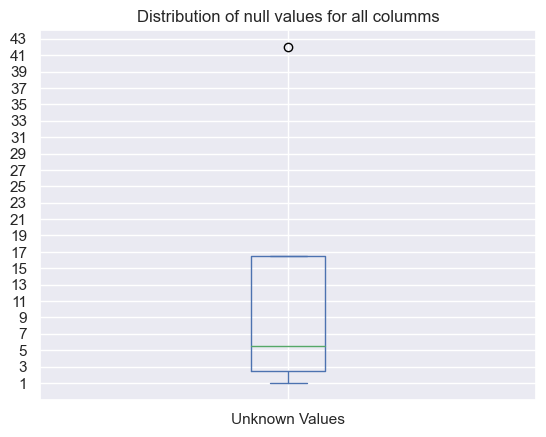

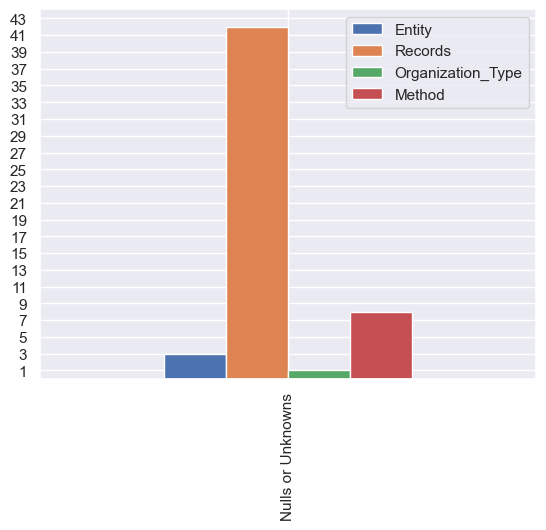

In [27]:
 # Now, lets deal with null values. They have been transformed to unknown values.
 # THe following columns have unknown values: Entity, Records, Organization_Type, Method
list_data_breach_cols = list(data_breach_data_frame.columns)
list_data_breach_cols_unknown = list_data_breach_cols[0:1] + list_data_breach_cols[2:]
    
data_frame_null = data_breach_data_frame[(data_breach_data_frame['Entity'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None) )
                       | (data_breach_data_frame['Organization_Type'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None))
                       | (data_breach_data_frame['Records'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None))
                       | (data_breach_data_frame['Method'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None))]

# This helps visualise, understand the null values distribution. 
data = [sum(data_breach_data_frame[column].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)) for column in list_data_breach_cols_unknown]
arr_data = np.array(data)
arr_data = arr_data.reshape(1,arr_data.size)

null_unknowns_df = pd.DataFrame(data=arr_data,columns=['Entity','Records','Organization_Type','Method'],index=['Nulls or Unknowns'])

print(null_unknowns_df)
print(data_frame_null)
print(pd.DataFrame(data,columns=['Unknown Values']).plot(kind='box',yticks=np.arange(1,max(data) + 3,2),title='Distribution of null values for all columms'))
null_unknowns_df.plot(kind='bar',yticks=np.arange(1,max(data) + 3,2))

In [28]:
# There is a considerable amount of ways to deal with missing values. (entire sub-secion of statistics in itself)
# To make a decision, based on the context and the following questions were thought about.
    # What bias will it have changing, imputing or deleting the dataset ? # How large is the dataset ? 
    # Why is the value missing ? 
        # Is the missing values compeletely at random ? (MCAR)
        # Is the missing values at random ? (MAR)
        # Is the missing values not at random ? (MNAR)
        
    # Speculations: 
    # For records column the amount of data stolen, accessed and stored might not be known, 
        # maybe there is no way of knowing as it was a complex system or some other reason. 
    # For the method column, the method to achieve the data breach maybe:
        # Unknown, Not Provided, Too many methods, Error in inputting data, source is not accurate/updated
        # hence, these and multiple other reasons maybe for a possible explanation.
    # The missing values most likely are due to randomness, are independent from the other data records.

    # Maybe a reason for the null value for Bethesda Game Studios and Wordpress
     # The entities might not want to provide the exact number of records that they acidentially published/hacked: 
            #  - Lose reputation, trust and customers.
            #  - Legal action can be taken on the entity. 
    # Since, there is no way of knowing this. Currently, this is classified as missing value at random. 



In [29]:
# Missing value solution Entity column. 

In [30]:
data_breach_data_frame[data_breach_data_frame['Entity'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)]
# Since entity name is a alphanumeric characters, there is no way of deducing, what it can be. 
# Hence, they are left as unknown. Some data processing is conducted for id 347

,Entity,Year,Records,Organization_Type,Method
124,Unknown,2020,201000000,Unknown,hacked
178,Unknown,2012,160000000,Financial,hacked
347,Unknown agency,2020,200000000,Financial,accidental exposure


In [31]:

data_breach_data_frame.loc[347,'Entity'] = 'Unknown'
data_breach_data_frame[data_breach_data_frame['Entity'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)]
# col_value_name_change function made, could also have been used. Since, this a single value; 
# for some values a more deliberate, altering individually is better suited for presenting work and for others to understand it. 

,Entity,Year,Records,Organization_Type,Method
124,Unknown,2020,201000000,Unknown,hacked
178,Unknown,2012,160000000,Financial,hacked
347,Unknown,2020,200000000,Financial,accidental exposure


In [32]:
# Missing value solutions Method column.
data_breach_data_frame[data_breach_data_frame['Method'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)]
# Each datapoint in the method column can be deduced, 
# since this is a old dataset updates on the data breach might have been provided. 
# so searching them online using other data within the same row 
# e.g. 'BetssonGroup 2020 data breach' will provide news articles on what occured. 
# This information can be used to find the method used.  

# since such a labourious process for a lot of these rows is unsuitable and time consuming. 
# The most common method category (mode) is imputed for these rows. 
# Many techniques exist, with other advanced ones being: Using ML to deduce the missing value, this is out of the scope for this project. 
# Future projects will look at all these techniques and more indepth and compare the best ones from various viewpoints. 
print(data_breach_data_frame['Method'].value_counts().sort_values(ascending=False))
# Since, most common method for data breaches to occur is hacked. 
# Cyber criminals finding vunerabilities and penetrating the system for their various aims,
# mainly for financial rewards, by selling the dataset; or releasing it to the public to put pressure on the entity to act and pay them. 
# Hence, the unknown values are changed to hacked. 
col_value_name_change(data_breach_data_frame,'Method','unknown','hacked',show_old_new=True,inplace=True)
data_breach_data_frame[data_breach_data_frame['Method'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)]
# Now, there are no method with unknown/null values.

hacked                 246
theft                   50
accidental exposure     29
insider job             20
unknown                  8
Name: Method, dtype: int64
-- Old -- 
                      Entity                   Year  Records    Organization_Type    Method 
41                              Betsson Group  2020   unknown              Gambling  unknown
59                                CheckPeople  2020  56000000  Information Security  unknown
83              Democratic National Committee  2016     19252            Government  unknown
140                  Health Service Executive  2021   unknown           Health Care  unknown
151  International Committee of the Red Cross  2022    515000          Humanitarian  unknown
-- New -- 
                      Entity                   Year  Records    Organization_Type    Method
41                              Betsson Group  2020   unknown              Gambling  hacked
59                                CheckPeople  2020  56000000  Information

,Entity,Year,Records,Organization_Type,Method


In [33]:
# Missing value solutions Organisation Type column. 
print(data_breach_data_frame[data_breach_data_frame['Organization_Type'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)])
# There is no way of knowing the organisation type. But other data can help infer the organisation type that could have been compromised. 
# Since, there are two unknowns in this row, one way to deal with this is deleting the row
# Alternatively, the most occuring organisation type can be utilised. 
print(data_breach_data_frame['Organization_Type'].value_counts())
# lastly other columns can aid in infering the organization type. 
    # E.g. All hacked entities 201000000 records minus and plus a quantity(similar to a range or confidence interval)
# Since, the number of categories are varied, but most entities have an online presence. 
# hence online is used for organisation type.
data_breach_data_frame.loc[124,'Organization_Type'] = 'Online'
data_breach_data_frame[data_breach_data_frame['Organization_Type'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)]


     Entity   Year  Records   Organization_Type  Method
124  Unknown  2020  201000000       Unknown      hacked
Online                    68
Health Care               48
Financial                 41
Government                37
Retail                    29
Technology                22
Telecommunications        16
Gaming                    13
Academic                  13
Social Media              12
Military                   8
Hotel                      8
Transport                  7
Energy                     4
Media                      3
Restaurant                 3
Information Security       3
Information Technology     3
Mobile Carrier             2
Consumer Goods             2
Consulting, Accounting     1
Messaging App              1
Gambling                   1
Unknown                    1
Educational Services       1
Humanitarian               1
Genealogy                  1
Advertising                1
Clinical Laboratory        1
Market Analysis            1
Arts              

,Entity,Year,Records,Organization_Type,Method


In [34]:
# Missing value solutions Record column.

records_unknown_df = data_breach_data_frame[data_breach_data_frame['Records'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)]

# - One possible way to determine an approximate number for the records is to ask the entity involved
# on an estimate since they interact with thier dataset or delegate this process to some other entity. 
    
# - The missing value rows in the dataset can be deleted, if the percentage of missing values is low, compared to dataset size. 
percentage_of_missing_values = len(records_unknown_df.index) / len(data_breach_data_frame.index) * 100
print(f'Percent missing values: {percentage_of_missing_values} %')
# Since the percentage of missing values is approx 11.90 %.
# The missing value rows can be dropped, it will cause signinficant variability to the dataset.
# Yet it will still have a minute impact. Hence, imputations are used. 
        
# - Imputing via central tendency measures. 
    # Mean, Median, Mode, Range, etc...

data_breach_data_frame_not_missing_values = data_breach_data_frame[data_breach_data_frame['Records'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is None)]
casted_data_frame = data_breach_data_frame_not_missing_values['Records'].astype(int)
median = casted_data_frame.median()
mean =   casted_data_frame.mean()
mode =   casted_data_frame.mode()
ran = casted_data_frame.max() -  casted_data_frame.min()

print('median:',median)
print('mean:',mean)
print('mode:',mode)
print('range:',ran)
print('\nUnknown Values:')
print(data_breach_data_frame[data_breach_data_frame['Records'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)])

# The median is used for the Records column. 
col_value_name_change(data_breach_data_frame,'Records','unknown',str(round(median)),show_old_new=True,inplace=True,n_rows=10)

print('\n No more Unknowns...',data_breach_data_frame[data_breach_data_frame['Records'].apply(lambda column_name: re.search('.*unkn.*',column_name,re.IGNORECASE) is not None)])

# - Imputing the dataset based on modelling the dataset missing values. (to be considered in the future.)

# Casting the records columns now to an integer 
data_breach_data_frame['Records'] = data_breach_data_frame['Records'].astype(int)

Percent missing values: 11.89801699716714 %
median: 1900000.0
mean: 43112489.414790995
mode: 0    1500000
Name: Records, dtype: int64
range: 2999999650

Unknown Values:
                       Entity                     Year Records     Organization_Type           Method       
10                             Amazon Japan G.K.  2019  unknown                  Online  accidental exposure
25                                         Atraf  2021  unknown                  Online               hacked
27             Australian Immigration Department  2015  unknown              Government  accidental exposure
28                Australian National University  2019  unknown                Academic               hacked
34                                Barnes & Noble  2012  unknown                  Retail               hacked
40                         Bethesda Game Studios  2018  unknown                  Gaming  accidental exposure
41                                 Betsson Group  2020  unknown     

In [35]:
# Now, Data cleaning stage has been compeleted. 
# Now the attention shifts to data analysis stage. 
# Questions:
    # Which Entity has the most data records breached ? 
    # Which method is commonly used to do data breaches ? 
    # What is the variability in their data records ? 
    # What Organization_Type is mainly breached ? 
    # Which entity has been breached the most frequent number of times ? 
    # What year had the most data breaches ? 
    # What is the 'best' data breach that occurred ? 
    # What is the 'trend' in data breaches ?

# Which Entity has the most data records breached ? 

In [36]:
# Exploring the data set

In [37]:
data_breach_data_frame.info()
# The sample size for dataset (only 353 data breaches) is significantly small compared to the number of data breaches that occurs in a single year. 
# Hence, any strong conclusions can't be reached. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             353 non-null    object
 1   Year               353 non-null    int64 
 2   Records            353 non-null    int64 
 3   Organization_Type  353 non-null    object
 4   Method             353 non-null    object
dtypes: int64(2), object(3)
memory usage: 13.9+ KB


In [38]:
# Which Entity has the most data records breached ? 
data_breach_data_frame[data_breach_data_frame['Records'] == data_breach_data_frame['Records'].max()]
# Yahoo. 

,Entity,Year,Records,Organization_Type,Method
339,Yahoo,2013,3000000000,Online,hacked


In [39]:
# What are the top 10 entities that have thier data records breached ? 
# What is the variability in their data records ? 
print(data_breach_data_frame.sort_values(by='Records',ascending=False).head(10))
# Mean and standard deviation. 

print('Mean', data_breach_data_frame.sort_values(by='Records',ascending=False).head(10)['Records'].mean()) 
# A better mean to utilise is the trimmed mean, since there are extrmeme values. 
print('Min: ', data_breach_data_frame['Records'].min(), 'Max: ', data_breach_data_frame['Records'].max())
# There is a signifnican difference between the min and max of the data records. 
# Hence, a trimmed mean is a suitable mean for the average/central tendency of the dataset.

def trimmed_mean(data_frame,column,x_percentage):
    series = data_frame[column].sort_values()
    cnt = len(series)
    num_rows_remove = round((x_percentage/100) * cnt)
    series_trimmed_values = series[num_rows_remove:cnt - num_rows_remove + 1]
    return series_trimmed_values.mean()
    
print('Trimmed Mean:', trimmed_mean(data_breach_data_frame,'Records',10)) # 10 % trimmed mean. 

print('Standard Deviation:', data_breach_data_frame.sort_values(by='Records',ascending=False).head(10)['Records'].std())
# indicates that there is quite a substantial variability. The average distance from the mean.  



               Entity            Year    Records   Organization_Type   Method
339                       Yahoo  2013  3000000000              Online  hacked
118  First American Corporation  2019   885000000           Financial  hacked
112                    Facebook  2019   540000000        Social Media  hacked
340                       Yahoo  2014   500000000              Online  hacked
175      Marriott International  2018   500000000               Hotel  hacked
121      Friend Finder Networks  2016   412214295              Online  hacked
106                     Exactis  2018   340000000              Online  hacked
8                        Airtel  2019   320000000  Telecommunications  hacked
284                  Truecaller  2019   299055000              Online  hacked
190                     MongoDB  2019   275000000          Technology  hacked
Mean 707126929.5
Min:  350 Max:  3000000000
Trimmed Mean: 9180585.126760563
Standard Deviation: 825127570.8631272


In [40]:
# What Organization_Type is mainly breached ? 
data_breach_data_frame['Organization_Type'].value_counts()
# Organisations that are online are maily breached. 


Online                    69
Health Care               48
Financial                 41
Government                37
Retail                    29
Technology                22
Telecommunications        16
Gaming                    13
Academic                  13
Social Media              12
Military                   8
Hotel                      8
Transport                  7
Energy                     4
Media                      3
Restaurant                 3
Information Security       3
Information Technology     3
Mobile Carrier             2
Consumer Goods             2
Consulting, Accounting     1
Messaging App              1
Gambling                   1
Educational Services       1
Humanitarian               1
Genealogy                  1
Advertising                1
Clinical Laboratory        1
Market Analysis            1
Arts                       1
Name: Organization_Type, dtype: int64

In [41]:
# Which entity has been breached the most frequent number of times ? 
data_breach_data_frame['Entity'].value_counts(ascending=False).head(1)
# Facebook has been the entiy with the most frequent number of data breaches. 

Facebook    5
Name: Entity, dtype: int64

In [42]:
# Years Exploratoray data analysis. 
print(data_breach_data_frame.groupby('Year').describe())

print(data_breach_data_frame.groupby('Year').describe().iloc[:,0].sort_values(ascending=False))
# Year 2011 had the most data breacheds, occur to various entites. 

     Records                                                                                          
      count       mean          std         min        25%         50%          75%           max     
Year                                                                                                  
2004    2.0   4.625500e+07  6.469320e+07  510000.0  23382500.0  46255000.0  6.912750e+07  9.200000e+07
2005    6.0   7.804167e+06  1.583184e+07  125000.0    450000.0   1300000.0  3.275000e+06  4.000000e+07
2006    7.0   1.018000e+07  1.072027e+07  200000.0   1780000.0   4000000.0  1.850000e+07  2.650000e+07
2007   12.0   1.277387e+07  2.649247e+07   89000.0    950000.0   3600000.0  8.534351e+06  9.400000e+07
2008   16.0   4.316656e+06  5.403167e+06   50500.0    109000.0   1900000.0  6.500000e+06  1.800000e+07
2009   13.0   1.965138e+07  3.955621e+07   72000.0    500000.0   1023209.0  8.257378e+06  1.300000e+08
2010   19.0   8.410777e+05  9.676333e+05   43000.0    205755.5    398000.

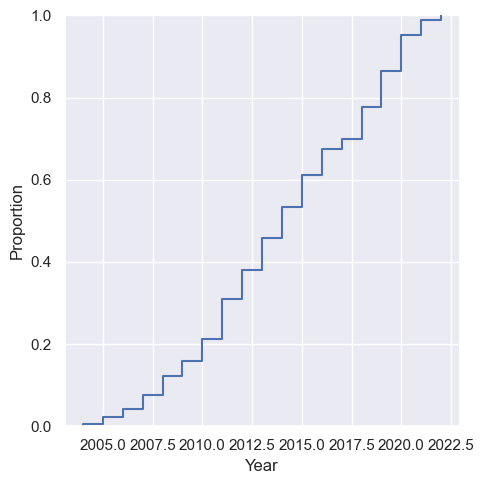

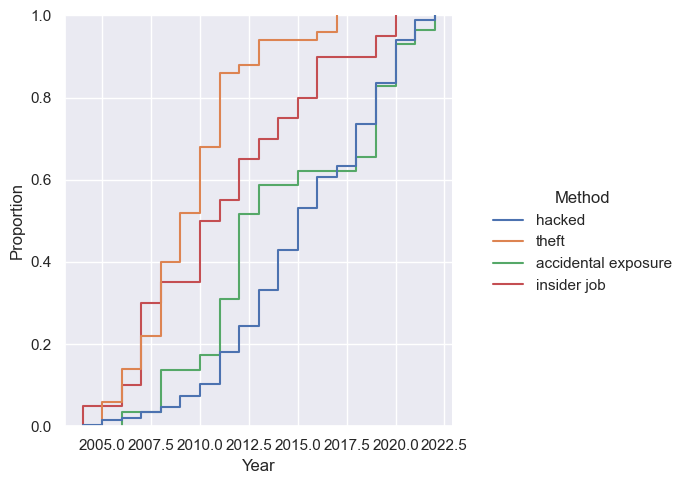

In [43]:
# How does the cumulative frequency of data records change over time per year ? 
#data_breach_data_frame.groupby('Year').aggregate([np.mean,'sum']).iloc[:,1].cumsum().plot(kind='line')
print(sns.displot(data_breach_data_frame, x="Year", kind="ecdf")) 
print(sns.displot(data_breach_data_frame, x="Year", kind="ecdf",hue='Method')) 

 # Which method, contributed to the cumulative increase in data breach increase. 
# the first few years (2005 - 2011) there was a slow and steady increase of data records, 
# thereafter there was a moderate to large increase per year (2011-2020).
# Notice that after 2020, the straight line plateau indicates no new datapoints, doesn't mean there was no increase in thse years. 




In [44]:
# What is the 'best' data breach that occurred ? 
# The best can be interepreted as the most number of data records that were breached,
# the quickest in time as a databreach, the damage done, the most publicly infurirating, etc.. 
# based on the available output given, the best is the most records breached, see above. 

# What is the 'trend' in data breaches ?
# The rate of increase in data breaches, the method segments that contribute to the increase,
# The organisation types that changed over time being compromised, Etc... 
# Can be interpreted in a multitude of ways. 
# Here the trend is that data breaches are occurring consistently over time. 


In [45]:
# Data Visualisations. 
# Multiprocessing. 
    # The aim of this is to determine wether multiprocessing would be useful for the visualisations of interrest. 
    # If useful the function with the multiprocessing utilised will be used. 
    # Since, the function of interest
    # Since, there is a lot of overhead. The multiprocessing library in this instance doesn't reduce the time and isn't viable solution. 

In [46]:
# For visualisation purposes, the dataset has substantial variability and is hard to visualise. 
# Especially as there are outliers/extreme values.
# Hence it needs to be reduced/trimmed. 
def trimmed_dataset(data_frame,col,proportion_or_percentage):
    '''Trimming the dataset, to reduce the variablity'''
    if type(proportion_or_percentage) is int:
        proportion_or_percentage = proportion_or_percentage/100
    len_data_frame = len(data_frame)
    rows_to_reduce = round(len_data_frame *  proportion_or_percentage)
    
    return data_frame.sort_values(by=col)[rows_to_reduce: len_data_frame - rows_to_reduce]

# Visualisations 
# 5 % of the dataset is trimmed.   
data_frame = trimmed_dataset(data_breach_data_frame,'Records',0.05)

In [47]:
# For numerical variables, the following plots are used. Explanation isn't provided as it can be interpreted. 

AxesSubplot(0.125,0.11;0.775x0.77)


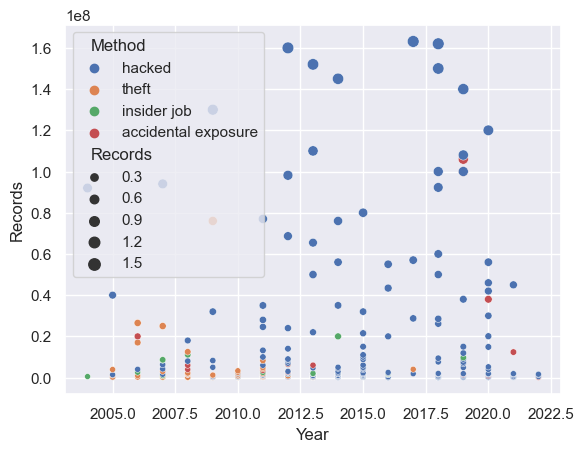

In [48]:
print(sns.scatterplot(data=data_frame,x='Year',y='Records',hue='Method',size='Records'))

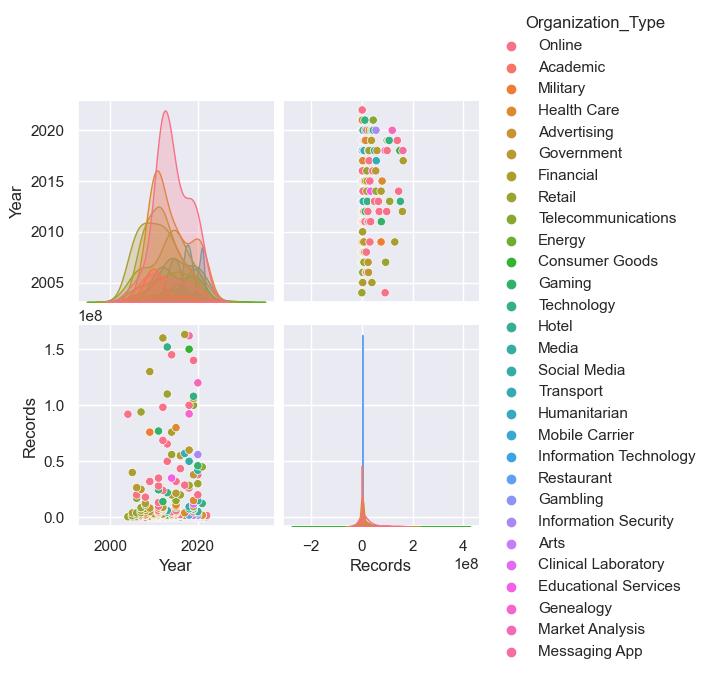

In [49]:
print(sns.pairplot(data_frame,hue='Organization_Type')) # Note the limitations of having too many categories, hard to distinguish and visualise when interpereting data. 

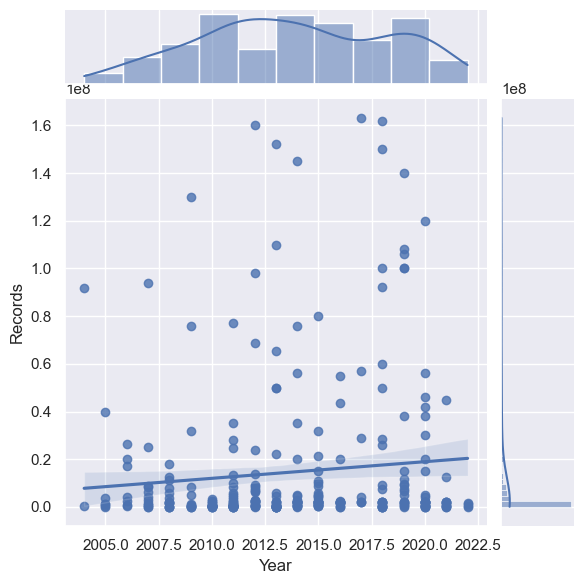

In [50]:
print(sns.jointplot(data=data_frame,x='Year',y='Records',kind='reg'))

In [51]:
# For Categorical Variables, the following plots are used. Explanation isn't provided as it can be interpreted. 
# When interpreting ensure scale is considered. E.g. 1e8 => 1 * 10 ^ 8. 

AxesSubplot(0.125,0.11;0.775x0.77)


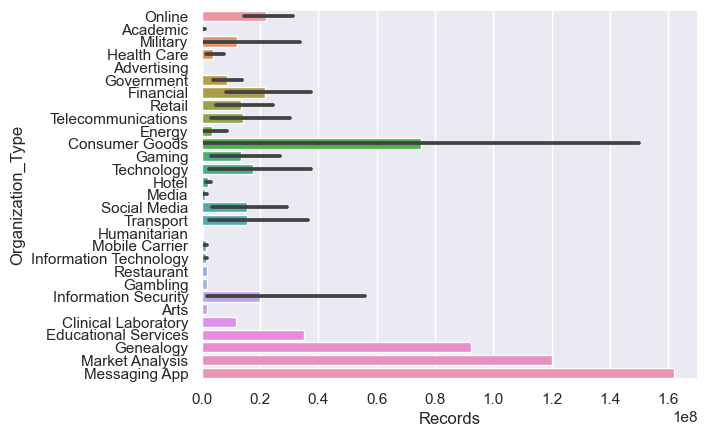

In [52]:
print(sns.barplot(data=data_frame,y='Organization_Type',x='Records'))

AxesSubplot(0.125,0.11;0.775x0.77)


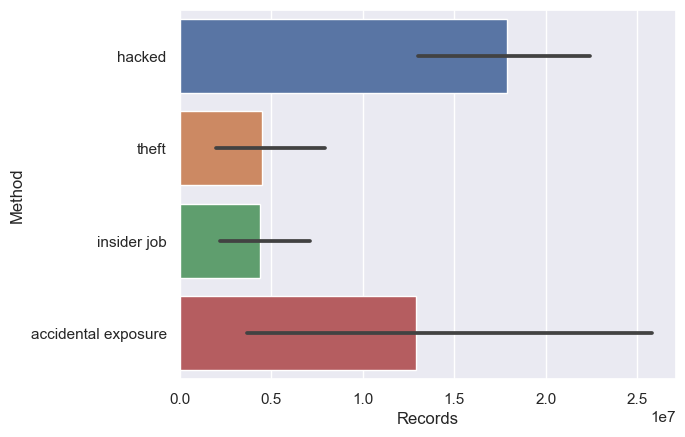

In [53]:
print(sns.barplot(data=data_frame,x='Records',y='Method'))

/Users/abhaypatel/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abhaypatel/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abhaypatel/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Method', ylabel='Records'>

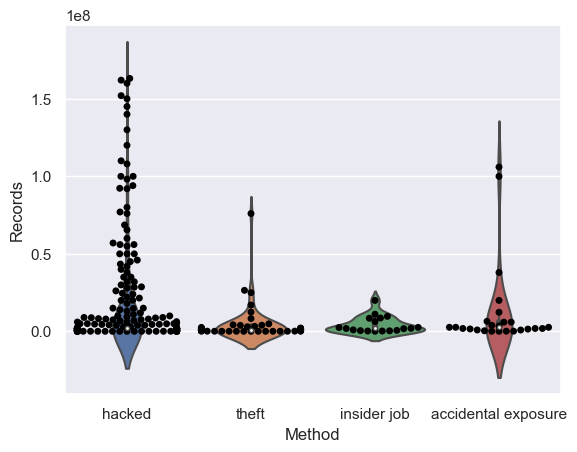

In [54]:
sns.swarmplot(data=data_frame,x='Method',y='Records',color='black')
sns.violinplot(data=data_frame,x='Method',y='Records')

/Users/abhaypatel/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


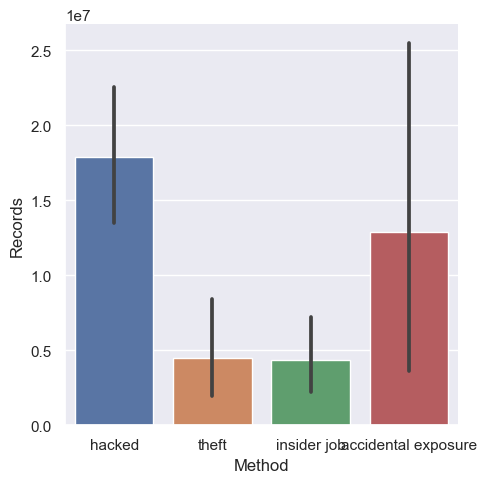

In [55]:
sns.factorplot(data=data_frame,x='Method',y='Records',kind='bar')

In [56]:
 # There are three ways in python to run code blocks simultaneously/in parallel. 
       # Using Asyncio
       # Using Multiprocessing 
       # Using Threading. 

In [57]:
# Since the visualisation requires more i/o bound task; the multiprocessing module is used.
# Asyncio isn't used as files aren't been written or read from disk, especially in a bulk like operation.  
# Note that the use of modules depends of computer architecture, the efficiency of code and other factors. 
    # Hence it requires experimentation and fine tuning. As appropriately needed. 
# Since, the cells congregate and overlap for some functions, it's best to keep them separate. (as done above)
# The below code can be utilised for multiprocessing if needed. 
# The overhead of creating the processes in this case is approximatetly the same as illustrated using the numerical plots. 
# Both times are very similar, hence, the use of multiprocessing isn't going to substantially increase performance for the use case below. 

def func_of_interest_1():
    ''' Executing the code sequentially '''
    print(sns.scatterplot(data=data_frame,x='Year',y='Records',hue='Method',size='Records'))
    print(sns.pairplot(data_frame,hue='Organization_Type'))
    print(sns.jointplot(data=data_frame,x='Year',y='Records',kind='reg'))

def func_of_interest_2():
    ''' One plausible way '''
    p1 = multiprocessing.Process(target=print(sns.scatterplot(data=data_frame,x='Year',y='Records',hue='Method',size='Records')))
    p2 = multiprocessing.Process(target=print(sns.pairplot(data_frame,hue='Organization_Type')))
    p3 = multiprocessing.Process(target=print(sns.jointplot(data=data_frame,x='Year',y='Records',kind='reg')))
    p1.start()
    p2.start()
    p3.start()
    p1.join()
    p2.join()
    p3.join()

def func_of_interest_3():
    ''' Another way, used more often.'''
    with concurrent.futures.ProcessPoolExecutor() as executor:
        executor.submit(print(sns.scatterplot(data=data_frame,x='Year',y='Records',hue='Method',size='Records')))
        executor.submit(print(sns.pairplot(data_frame,hue='Organization_Type')))
        executor.submit(print(sns.jointplot(data=data_frame,x='Year',y='Records',kind='reg')))
        
def func_surround(*funcs):
    ''' Code is kept for multiple functions one after another if needed. '''
    start_timer = time.perf_counter()
    for func,args in funcs: 
        func(*args)
    end_timer = time.perf_counter()
    print('Timer:',end_timer - start_timer)


AxesSubplot(0.125,0.11;0.775x0.77)
Timer: 2.8634867939999964


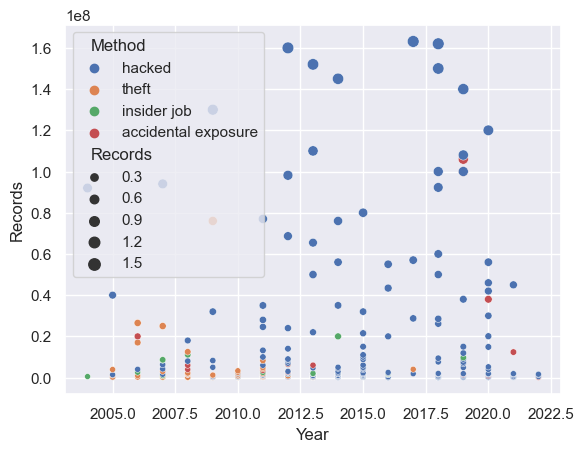

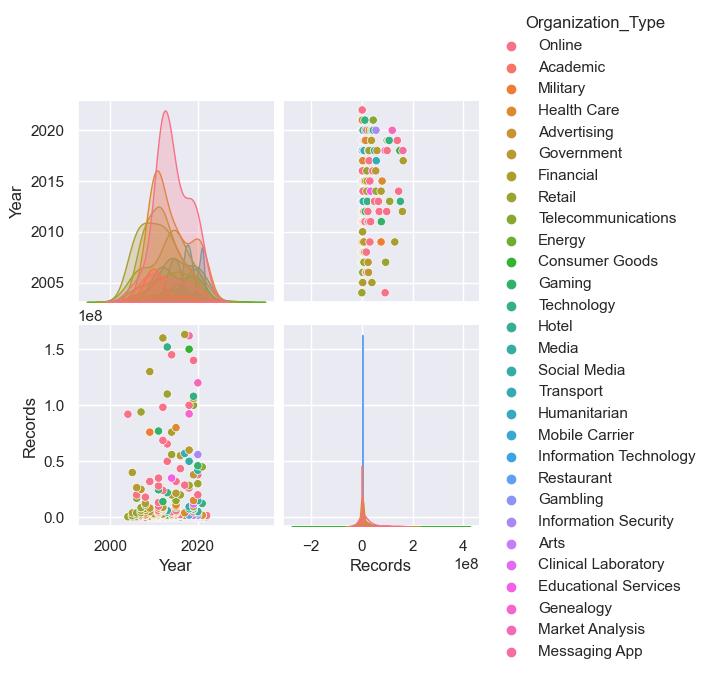

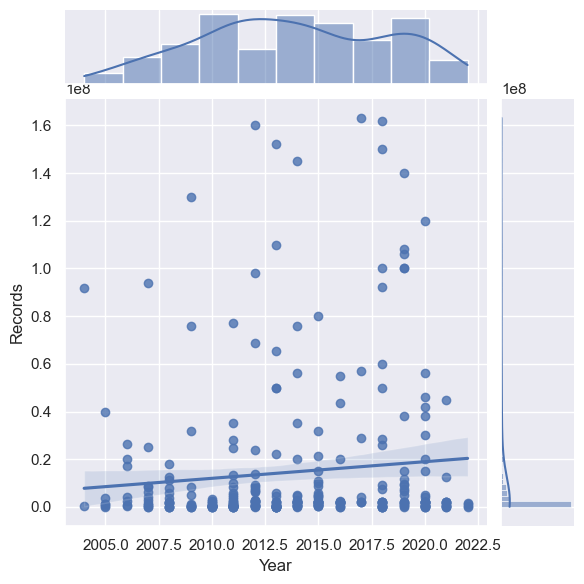

In [58]:
func_surround((func_of_interest_1,[]))

AxesSubplot(0.125,0.11;0.775x0.77)
Timer: 3.9441422980000027


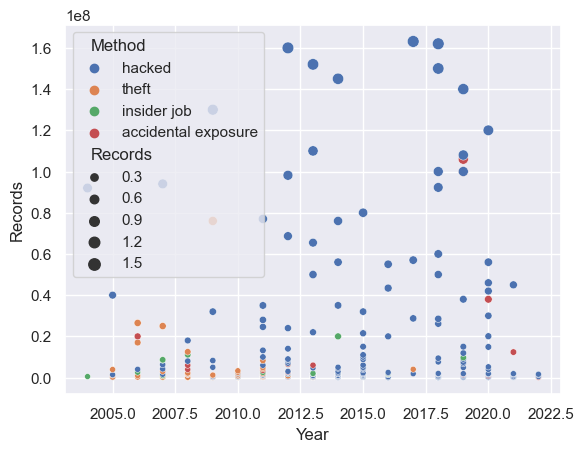

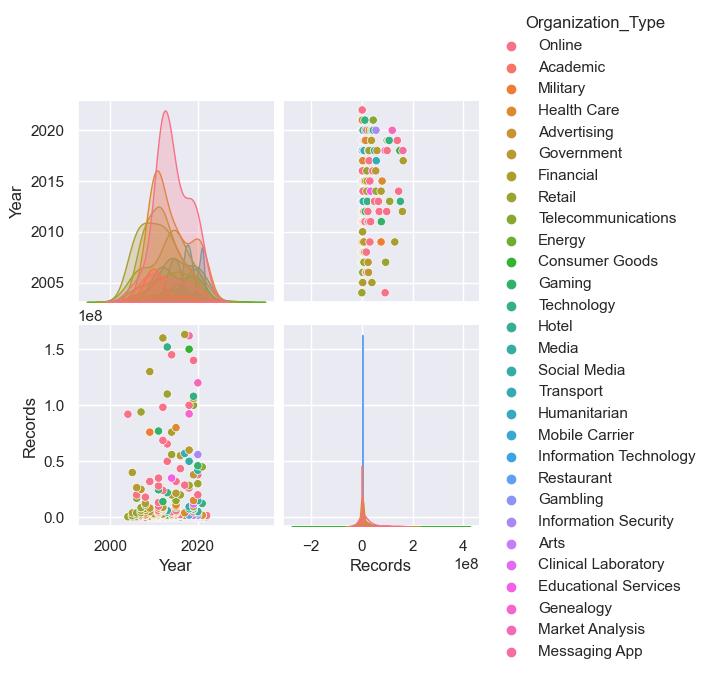

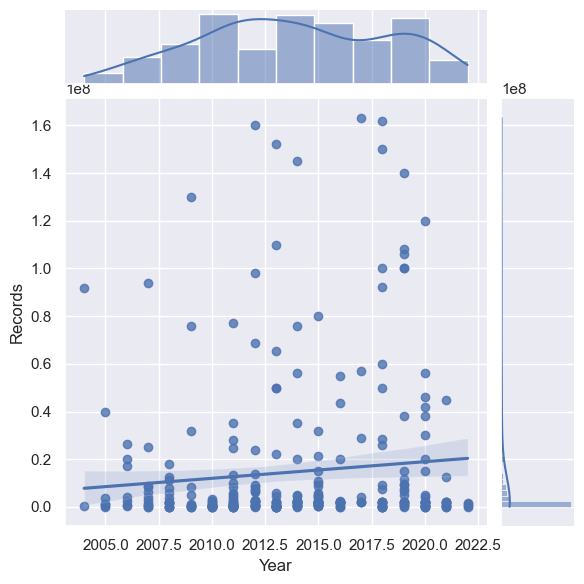

In [59]:
func_surround((func_of_interest_2,[]))

AxesSubplot(0.125,0.11;0.775x0.77)
Timer: 2.4776366629999984


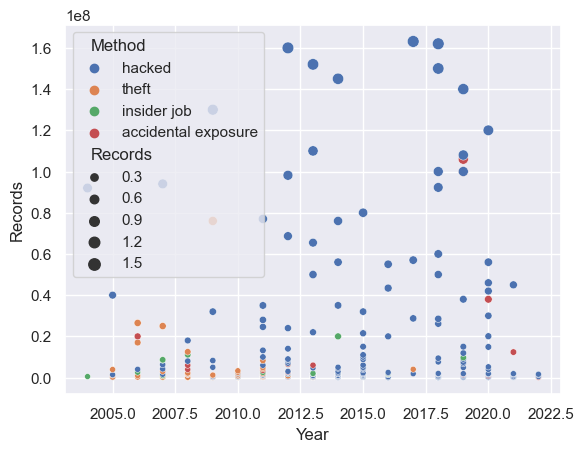

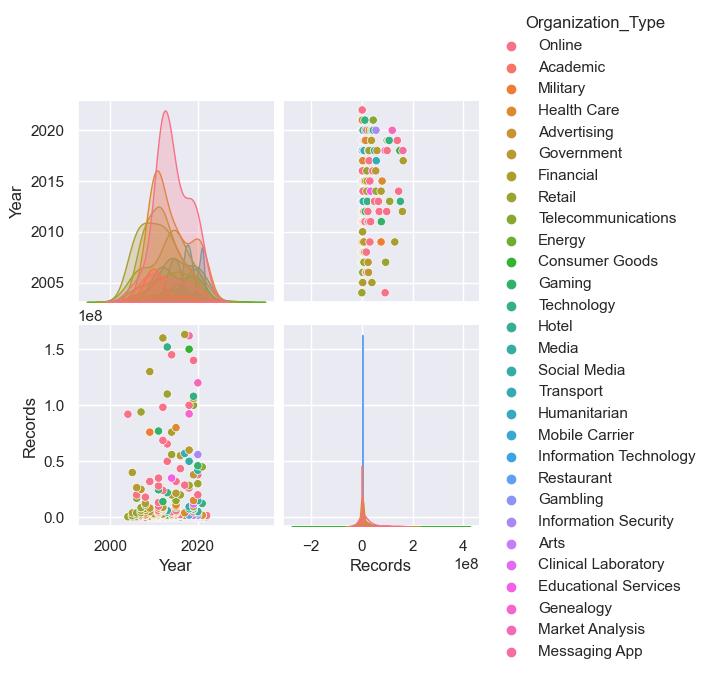

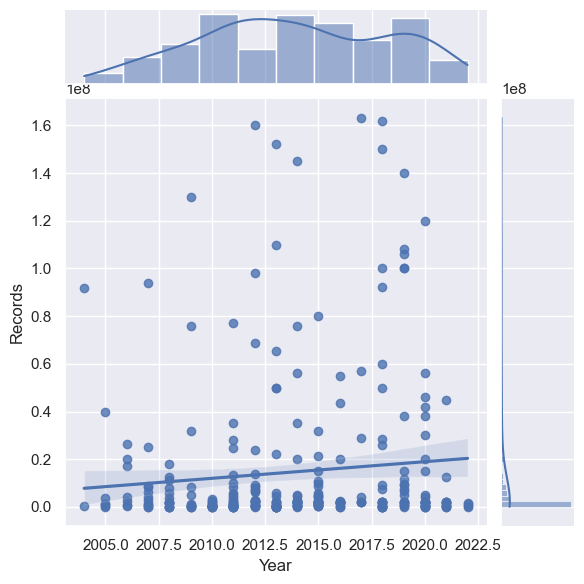

In [60]:
func_surround((func_of_interest_3,[]))

In [78]:
# Database Connectivity. 
# Saving the ouput. 
    # Initially dataset can be stored using the methods available. 
    # Using https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html for fmt(format available)
def save_to_local_disk(path,data_frame,file_name):
    path = os.path.expandvars(os.path.expanduser(path))
    if not os.path.isabs(path):
        path = os.path.abspath(path)
    if os.path.exists(path):
        os.chdir(path)
        dir_name = 'data_breach_key_word_data_analysis'
        os.mkdir(dir_name)
        os.chdir(dir_name)
        data_frame.to_csv(f'{file_name}.csv')
        data_frame.to_json(f'{file_name}.json')
        print('Saved in directory "' + dir_name + '" at path ' + path)
    else:
        print('Path Doesn\'t exist:' , path)
        
save_to_local_disk('.',data_breach_data_frame)



In [ ]:
# Summary. 
# All the aims given have been satisified.

In [89]:
# Improvements:
# Markdown and breaking the cell up for intermediatory output to be shown. 
# Improvements section at the very end. 
    # Learn how multiple numeric and non numeric variables affect a single variable (Learn math). 
    # PEP8, other formatting for code; docstrings for functions for readability. 
    # More automated data processing. 
    # An images database storage solution that's very light. 
# Review and reflect on explanation being unclear, hard to follow, improve english writing skills. 
# Connect to a database. Via cloud, in memory or on local disk. 
# Change comments for self, TO DO. Preambles. 
# regex leading zeros not accounted for. 